In [1]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util


TensorFlow version: 2.15.0


In [2]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [3]:
model = MultiPoleModel(moments=3, lrate=0.00025, optimizer='adam', loss='mae', scale=1e9, early_stop=False, target_stop=2)
test_epochs = 2000

In [4]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 126.38513
epoch  1 --- Loss --- 125.02639
epoch  2 --- Loss --- 123.66353
epoch  3 --- Loss --- 122.29948
epoch  4 --- Loss --- 120.93449
epoch  5 --- Loss --- 119.56868
epoch  6 --- Loss --- 118.20216
epoch  7 --- Loss --- 116.83503
epoch  8 --- Loss --- 115.467354
epoch  9 --- Loss --- 114.09921
epoch  10 --- Loss --- 112.73065
epoch  11 --- Loss --- 111.36171
epoch  12 --- Loss --- 109.99241
epoch  13 --- Loss --- 108.622795
epoch  14 --- Loss --- 107.28332
epoch  15 --- Loss --- 105.98707
epoch  16 --- Loss --- 104.702065
epoch  17 --- Loss --- 103.41717
epoch  18 --- Loss --- 102.13193
epoch  19 --- Loss --- 100.84634
epoch  20 --- Loss --- 99.56036
epoch  21 --- Loss --- 98.273994
epoch  22 --- Loss --- 96.98721
epoch  23 --- Loss --- 95.7
epoch  24 --- Loss --- 94.479004
epoch  25 --- Loss --- 93.31021
epoch  26 --- Loss --- 92.14088
epoch  27 --- Loss --- 90.97015
epoch  28 --- Loss --- 89.79782
epoch  29 --- Loss --- 88.62374
epoch  30 --- Loss --- 87.457

In [5]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 59.355962419509886 minutes


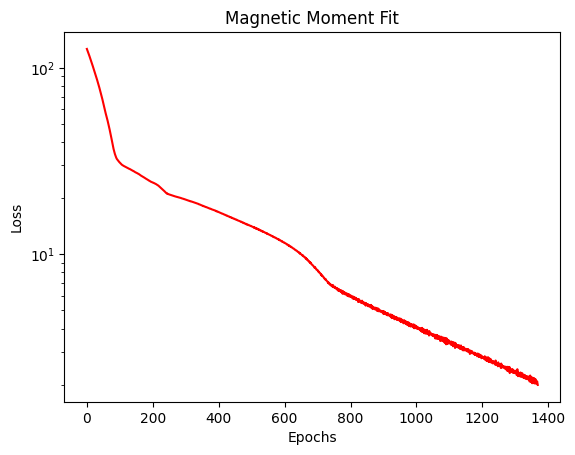

In [6]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
model.moment()

---- Moment  0 -----
Position:  [[-0.00405251  0.28490552 -0.01863327]]
Value:     [[-0.05438392  1.6052998   0.31364462]]
---- Moment  1 -----
Position:  [[-0.02802431 -0.03917634  0.16161   ]]
Value:     [[0.13559446 0.22669885 2.5435677 ]]
---- Moment  2 -----
Position:  [[ 0.508129   -0.01884013 -0.01566368]]
Value:     [[0.9070946  0.1065324  0.11306506]]
